In [177]:
import numpy as np
import pandas as pd

In [178]:
# 加载数据
data = pd.read_csv('F:/my_project\machinelearning/model_learning/Scorecard/german_credit.csv')

In [179]:
# 查看哪些列存在缺失值
data.isnull().any()

status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors               True
present_residence          False
property                   False
age                        False
other_installment_plans     True
housing                    False
number_credits             False
job                        False
people_liable              False
telephone                  False
foreign_worker             False
credit_risk                False
dtype: bool

In [180]:
# 查看缺失值列 other_debtors 的值分布情况
data['other_debtors'].value_counts(dropna=False)

NaN             907
guarantor        52
co-applicant     41
Name: other_debtors, dtype: int64

In [181]:
# 查看缺失值列 other_installment_plans 的值分布情况
data['other_installment_plans'].value_counts(dropna=False)

NaN       814
bank      139
stores     47
Name: other_installment_plans, dtype: int64

In [182]:
# 以上两列，缺失样本过多，作 “剔除该变量” 处理
data = data.drop(['other_debtors','other_installment_plans'], axis=1)

In [183]:
# 查看数据维度
data.shape

(1000, 19)

In [184]:
# 查看数据的列名
data.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'present_residence', 'property', 'age', 'housing', 'number_credits',
       'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [185]:
# 输出描述性统计分析，概览数据结构，以及数值型变量，未显示的为名义型变量
data.describe()

,duration,amount,installment_rate,present_residence,age,number_credits,people_liable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [186]:
# 找出定性的和定量的变量
factor_var = ['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
               'personal_status_sex', 'property', 'housing', 'job', 'telephone', 'foreign_worker']
num_var = ['duration', 'amount', 'installment_rate', 'present_residence', 'age',
              'number_credits', 'people_liable']

# 提取定量、定性数据
factor_train = data[factor_var]
num_train = data[num_var]

In [187]:
# 同过直方图，查看数据的分布情况，由于名义型变量字符太长，显示的时候会叠在一起看不清楚，因此此处只查看数值型变量，名义型变量通过另一种方式展示
import matplotlib.pyplot as plt
plt.figure()
for i, fea in enumerate(num_var):
    plt.subplot(331 + i)
    plt.hist(num_train[fea])
    plt.title(fea)
    plt.tight_layout(1.5)

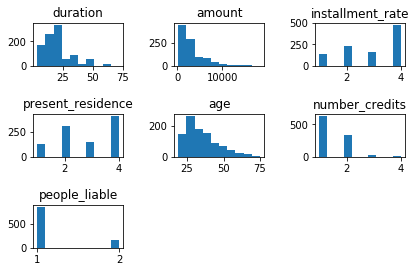

In [188]:
plt.show()      # 可以看到数据中并不存在异常值

In [189]:
# 注意上方的图，只有 duration， amount， age 是连续的，其他变量虽为数值，但不连续，且维度较少，最多也就4维。
# 因此后面在做分组的时候，只需要对这三个变量分组即可。

In [190]:
# 接着依次使用下面的方法查看名义型变量的分布情况
factor_train['status'].value_counts(dropna=False)

no checking account                           394
... < 100 DM                                  274
0 <= ... < 200 DM                             269
... >= 200 DM / salary for at least 1 year     63
Name: status, dtype: int64

In [191]:
factor_train['credit_history'].value_counts(dropna=False)

existing credits paid back duly till now       530
critical account/other credits existing        293
delay in paying off in the past                 88
all credits at this bank paid back duly         49
no credits taken/all credits paid back duly     40
Name: credit_history, dtype: int64

In [192]:
factor_train['purpose'].value_counts(dropna=False)

domestic appliances    280
car (new)              234
radio/television       181
car (used)             103
others                  97
retraining              50
education               22
furniture/equipment     12
repairs                 12
business                 9
Name: purpose, dtype: int64

In [193]:
factor_train['savings'].value_counts(dropna=False)

... < 100 DM                  603
unknown/no savings account    183
100 <= ... < 500 DM           103
500 <= ... < 1000 DM           63
... >= 1000 DM                 48
Name: savings, dtype: int64

In [194]:
factor_train['employment_duration'].value_counts(dropna=False)

1 <= ... < 4 years    339
... >= 7 years        253
4 <= ... < 7 years    174
... < 1 year          172
unemployed             62
Name: employment_duration, dtype: int64

In [195]:
factor_train['personal_status_sex'].value_counts(dropna=False)

male : single                          548
female : divorced/separated/married    310
male : married/widowed                  92
male : divorced/separated               50
Name: personal_status_sex, dtype: int64

In [196]:
factor_train['property'].value_counts(dropna=False)

car or other                                         332
real estate                                          282
building society savings agreement/life insurance    232
unknown/no property                                  154
Name: property, dtype: int64

In [197]:
factor_train['housing'].value_counts(dropna=False)

own         713
rent        179
for free    108
Name: housing, dtype: int64

In [198]:
factor_train['job'].value_counts(dropna=False)

skilled employee/official                                     630
unskilled - resident                                          200
management/self-employed/highly qualified employee/officer    148
unemployed/unskilled - non-resident                            22
Name: job, dtype: int64

In [199]:
factor_train['telephone'].value_counts(dropna=False)

no     596
yes    404
Name: telephone, dtype: int64

In [200]:
factor_train['foreign_worker'].value_counts(dropna=False)

yes    963
no      37
Name: foreign_worker, dtype: int64

In [201]:
# 通过上面可以大概的观察到每个名义变量值频数情况以及维度情况，如过维度过多，需要进行将维处理，比如：purpose

In [202]:
# ——————————————黄金分割线————————————————

In [144]:
# 分离数据集
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=0)    # 测试集占比 0.2，训练集占比 0.8

In [145]:
# 定量特征选择，这里我们使用sklearn.feature_selection库的单变量特征选择的方法
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

num_train = train_data[num_var]     # 从新获取定量变量
target = train_data[['credit_risk']]    # 获取训练集所对应的标签
new_num_train = SelectKBest(chi2, k=4).fit_transform(num_train, target)

In [146]:
# 需要注意的是，特征选择之后，得到的二维数组（矩阵），不再是pandas.DataFrame了。
new_num_train

array([[  36, 2862,    4,   30],
       [  24, 3123,    4,   27],
       [  60, 7408,    4,   24],
       ..., 
       [   9, 3832,    1,   64],
       [  18, 1928,    2,   31],
       [  36, 9857,    1,   31]], dtype=int64)

In [147]:
num_train.head()

,duration,amount,installment_rate,present_residence,age,number_credits,people_liable
687,36,2862,4,3,30,1,1
500,24,3123,4,1,27,1,1
332,60,7408,4,2,24,1,1
979,15,1264,2,2,25,1,1
817,6,1554,1,2,24,2,1


In [148]:
# 经过数据对比，可以看到筛选过后，所保留的变量。为了清除地知道每一步操作所用的数据是哪些，我们一直使用数据框格式的数据
# 从训练集中删除不需要的定量指标
drop_num_var = ['present_residence','number_credits','people_liable']
train_data = train_data.drop(drop_num_var, axis=1)

In [149]:
train_data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,property,age,housing,job,telephone,foreign_worker,credit_risk
687,0 <= ... < 200 DM,36,delay in paying off in the past,car (new),2862,100 <= ... < 500 DM,... >= 7 years,4,male : single,unknown/no property,30,for free,skilled employee/official,no,yes,good
500,... < 100 DM,24,existing credits paid back duly till now,car (new),3123,... < 100 DM,... < 1 year,4,female : divorced/separated/married,building society savings agreement/life insurance,27,own,skilled employee/official,no,yes,bad
332,0 <= ... < 200 DM,60,existing credits paid back duly till now,car (new),7408,100 <= ... < 500 DM,... < 1 year,4,female : divorced/separated/married,building society savings agreement/life insurance,24,own,management/self-employed/highly qualified empl...,no,yes,bad
979,0 <= ... < 200 DM,15,all credits at this bank paid back duly,car (new),1264,100 <= ... < 500 DM,1 <= ... < 4 years,2,male : married/widowed,building society savings agreement/life insurance,25,rent,skilled employee/official,no,yes,bad
817,no checking account,6,critical account/other credits existing,domestic appliances,1554,... < 100 DM,4 <= ... < 7 years,1,female : divorced/separated/married,car or other,24,rent,skilled employee/official,yes,yes,good


In [150]:
from sklearn import tree

In [157]:
cls = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3)

In [158]:
cls.fit(train_data[['duration']], target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=3, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

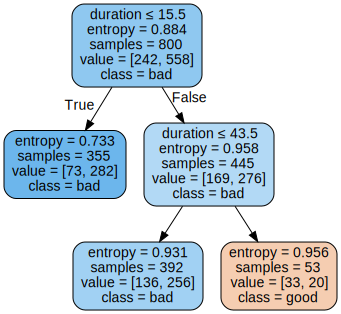

In [159]:
import graphviz 

dot_data = tree.export_graphviz(cls, out_file=None, 
                         feature_names=['duration'],  
                         class_names=['good', 'bad'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph 

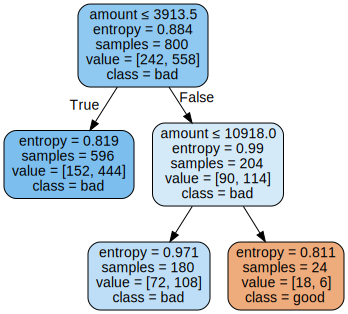

In [160]:
cls.fit(train_data[['amount']], target)
import graphviz 

dot_data = tree.export_graphviz(cls, out_file=None, 
                         feature_names=['amount'],  
                         class_names=['good', 'bad'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph 

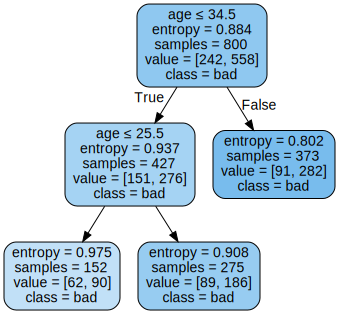

In [88]:
cls.fit(train_data[['age']], target)
import graphviz 

dot_data = tree.export_graphviz(cls, out_file=None, 
                         feature_names=['age'],  
                         class_names=['good', 'bad'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph 

In [161]:
# 根据上面的结果，得出最优分组的切分截点
cut_dict = {
    'duration': [-float('Inf'), 15,43, float('Inf')],
    'amount': [-float('Inf'), 3913,10918, float('Inf')],
    'age': [-float('Inf'), 25, 34, float('Inf')]
}

In [162]:
# 对每个变量进行切换，并将类型转换成字符串
train_data['duration'] = pd.cut(train_data['duration'], cut_dict['duration']).astype('str')
train_data['amount'] = pd.cut(train_data['amount'], cut_dict['amount']).astype('str')
train_data['age'] = pd.cut(train_data['age'], cut_dict['age']).astype('str')

In [163]:
# 再剔除不用的名义变量
train_data = train_data.drop(['employment_duration','personal_status_sex', 'housing', 'job', 'foreign_worker','telephone'], axis=1)

In [164]:
# 到这里，整个建模过程的数据集已经准备好了
train_data

,status,duration,credit_history,purpose,amount,savings,installment_rate,property,age,credit_risk
687,0 <= ... < 200 DM,"(15.0, 43.0]",delay in paying off in the past,car (new),"(-inf, 3913.0]",100 <= ... < 500 DM,4,unknown/no property,"(25.0, 34.0]",good
500,... < 100 DM,"(15.0, 43.0]",existing credits paid back duly till now,car (new),"(-inf, 3913.0]",... < 100 DM,4,building society savings agreement/life insurance,"(25.0, 34.0]",bad
332,0 <= ... < 200 DM,"(43.0, inf]",existing credits paid back duly till now,car (new),"(3913.0, 10918.0]",100 <= ... < 500 DM,4,building society savings agreement/life insurance,"(-inf, 25.0]",bad
979,0 <= ... < 200 DM,"(-inf, 15.0]",all credits at this bank paid back duly,car (new),"(-inf, 3913.0]",100 <= ... < 500 DM,2,building society savings agreement/life insurance,"(-inf, 25.0]",bad
817,no checking account,"(-inf, 15.0]",critical account/other credits existing,domestic appliances,"(-inf, 3913.0]",... < 100 DM,1,car or other,"(-inf, 25.0]",good
620,0 <= ... < 200 DM,"(15.0, 43.0]",critical account/other credits existing,others,"(-inf, 3913.0]",... < 100 DM,2,building society savings agreement/life insurance,"(25.0, 34.0]",good
814,... < 100 DM,"(43.0, inf]",existing credits paid back duly till now,car (new),"(3913.0, 10918.0]",... < 100 DM,4,unknown/no property,"(34.0, inf]",bad
516,... < 100 DM,"(-inf, 15.0]",critical account/other credits existing,car (new),"(-inf, 3913.0]",... < 100 DM,2,real estate,"(34.0, inf]",good
518,... < 100 DM,"(-inf, 15.0]",existing credits paid back duly till now,car (new),"(-inf, 3913.0]",100 <= ... < 500 DM,3,building society savings agreement/life insurance,"(34.0, inf]",good
940,no checking account,"(-inf, 15.0]",existing credits paid back duly till now,car (new),"(-inf, 3913.0]",unknown/no savings account,2,building society savings agreement/life insurance,"(34.0, inf]",good


In [165]:
# 从之前的观察数据分布情况中，我们知道除了purpose之外，其他特征最多是5维，purpose有10维， 因此需要做将维处理
train_data['purpose'].value_counts()  

domestic appliances    223
car (new)              180
radio/television       137
car (used)              86
others                  83
retraining              43
education               19
furniture/equipment     11
repairs                 10
business                 8
Name: purpose, dtype: int64

In [166]:
# 对相似含义的变量值进行合并
train_data['purpose'] = train_data['purpose'].replace({'car (new)': 'car', 'car (used)':'car'})  # 对新旧汽车合并

In [169]:
# 对低频率类别进行合并
train_data['purpose'] = train_data['purpose'].replace({'repairs': 'others', 'business':'others'})  

In [171]:
train_data['purpose'] = train_data['purpose'].replace({'education': 'retraining/education', 'retraining':'retraining/education'})  

In [173]:
train_data['purpose'] = train_data['purpose'].replace({'radio/television': 'radio/television/furniture/equipment', 'furniture/equipment':'radio/television/furniture/equipment'}) 

In [175]:
train_data['purpose'].value_counts()

car                                     266
domestic appliances                     223
radio/television/furniture/equipment    148
others                                  101
retraining/education                     62
Name: purpose, dtype: int64

In [176]:
train_data.to_csv('F:/my_project\machinelearning/model_learning/Scorecard/train_data.csv', index=False)